# City Payroll Data Analysis

In [46]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import statistics
from scipy import stats

In [47]:
pd.set_option("display.max_row", 1000)
pd.set_option("display.max_column", 40)

In [48]:
data = pd.read_csv("Data/payroll.csv", low_memory = False)
data.head()

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,$70386.48,$16129.89,$17829.78,$17678.24,$22946.57,$14273.91,23.67%,$74584.48,$60310.57,$0.00,$0.00,$0.00,NaN,$369.12,$13904.79,$13904.79,NaN,NaN,98,1230,NaN,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,$13859.93,$11968.32,$14048.20,$1700.40,3.43%,$51207.45,$49507.05,$1269.83,$0.00,$239.20,$0.00,$11.13,$180.24,$1689.27,24,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,$23479.20,$21153.60,$24360.49,$4120.20,4.85%,$89029.61,$84909.41,$1954.51,$0.00,$1519.00,$0.00,$482.29,$164.40,$3637.91,24,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,$18560.38,$16471.18,$21110.80,$14275.44,24.76%,$71936.24,$57660.80,$0.00,$1585.72,$935.00,$0.00,$11504.72,$250.00,$2770.72,12,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,$17313.10,$15257.17,$17313.10,$5191.62,8.74%,$64583.37,$59391.75,$0.00,$4774.25,$0.00,$0.00,$417.37,$0.00,$4774.25,03,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285008 entries, 0 to 285007
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Row ID                        285008 non-null  int64  
 1   Year                          285008 non-null  int64  
 2   Department Title              285008 non-null  object 
 3   Payroll Department            231463 non-null  float64
 4   Record Number                 285008 non-null  object 
 5   Job Class Title               285008 non-null  object 
 6   Employment Type               285008 non-null  object 
 7   Hourly or Event Rate          263987 non-null  object 
 8   Projected Annual Salary       285008 non-null  object 
 9   Q1 Payments                   285008 non-null  object 
 10  Q2 Payments                   285008 non-null  object 
 11  Q3 Payments                   285008 non-null  object 
 12  Q4 Payments                   285008 non-nul

In [50]:
# replace all space in the columns with '_' 

data.columns = data.columns.str.replace(' ', '_')

In [51]:
data.columns

Index(['Row_ID', 'Year', 'Department_Title', 'Payroll_Department',
       'Record_Number', 'Job_Class_Title', 'Employment_Type',
       'Hourly_or_Event_Rate', 'Projected_Annual_Salary', 'Q1_Payments',
       'Q2_Payments', 'Q3_Payments', 'Q4_Payments', 'Payments_Over_Base_Pay',
       '%_Over_Base_Pay', 'Total_Payments', 'Base_Pay', 'Permanent_Bonus_Pay',
       'Longevity_Bonus_Pay', 'Temporary_Bonus_Pay', 'Lump_Sum_Pay',
       'Overtime_Pay', 'Other_Pay_&_Adjustments',
       'Other_Pay_(Payroll_Explorer)', 'MOU', 'MOU_Title', 'FMS_Department',
       'Job_Class', 'Pay_Grade', 'Average_Health_Cost', 'Average_Dental_Cost',
       'Average_Basic_Life', 'Average_Benefit_Cost', 'Benefits_Plan',
       'Job_Class_Link'],
      dtype='object')

In [52]:
# we need to replace `$` with '', and convert those columns into numerical columns so we can perform operations

def replace_func(columns):
    for column in columns:
        data[column] = data[column].str.replace("[$,%]", '', regex = True).astype(float)

In [53]:
# data['Base_Pay'] = data['Base_Pay'].replace("$", '').astype(float)

In [54]:
columns = ['Hourly_or_Event_Rate', 'Projected_Annual_Salary', 'Q1_Payments',
           'Q2_Payments', 'Q3_Payments', 'Q4_Payments', 'Payments_Over_Base_Pay',
           '%_Over_Base_Pay', 'Total_Payments', 'Base_Pay', 'Permanent_Bonus_Pay',
           'Longevity_Bonus_Pay', 'Temporary_Bonus_Pay', 'Lump_Sum_Pay',
           'Overtime_Pay', 'Other_Pay_&_Adjustments', 'Average_Dental_Cost',
           'Average_Basic_Life', 'Average_Benefit_Cost']


In [55]:
replace_func(columns)

In [56]:
data.head()

,Row_ID,Year,Department_Title,Payroll_Department,Record_Number,Job_Class_Title,Employment_Type,Hourly_or_Event_Rate,Projected_Annual_Salary,Q1_Payments,Q2_Payments,Q3_Payments,Q4_Payments,Payments_Over_Base_Pay,%_Over_Base_Pay,Total_Payments,Base_Pay,Permanent_Bonus_Pay,Longevity_Bonus_Pay,Temporary_Bonus_Pay,Lump_Sum_Pay,Overtime_Pay,Other_Pay_&_Adjustments,Other_Pay_(Payroll_Explorer),MOU,MOU_Title,FMS_Department,Job_Class,Pay_Grade,Average_Health_Cost,Average_Dental_Cost,Average_Basic_Life,Average_Benefit_Cost,Benefits_Plan,Job_Class_Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,70386.48,16129.89,17829.78,17678.24,22946.57,14273.91,23.67,74584.48,60310.57,0.00,0.00,0.0,NaN,369.12,13904.79,$13904.79,NaN,NaN,98,1230,NaN,$16842.08,1282.61,0.00,18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,25.12,52450.56,11331.00,13859.93,11968.32,14048.20,1700.40,3.43,51207.45,49507.05,1269.83,0.00,239.2,0.0,11.13,180.24,$1689.27,24,POLICE OFFICERS UNIT,70,2214,A,$11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,42.77,89303.76,20036.32,23479.20,21153.60,24360.49,4120.20,4.85,89029.61,84909.41,1954.51,0.00,1519.0,0.0,482.29,164.40,$3637.91,24,POLICE OFFICERS UNIT,70,2214,2,$11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,28.75,60028.96,15793.88,18560.38,16471.18,21110.80,14275.44,24.76,71936.24,57660.80,0.00,1585.72,935.0,0.0,11504.72,250.00,$2770.72,12,SUPV BLUE COLLAR,42,3184,0,$10710.24,405.24,11.40,11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,30.92,64553.13,14700.00,17313.10,15257.17,17313.10,5191.62,8.74,64583.37,59391.75,0.00,4774.25,0.0,0.0,417.37,0.00,$4774.25,03,CLERICAL UNIT,82,1368,0,$11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/1368.pdf


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285008 entries, 0 to 285007
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Row_ID                        285008 non-null  int64  
 1   Year                          285008 non-null  int64  
 2   Department_Title              285008 non-null  object 
 3   Payroll_Department            231463 non-null  float64
 4   Record_Number                 285008 non-null  object 
 5   Job_Class_Title               285008 non-null  object 
 6   Employment_Type               285008 non-null  object 
 7   Hourly_or_Event_Rate          263987 non-null  float64
 8   Projected_Annual_Salary       285008 non-null  float64
 9   Q1_Payments                   285008 non-null  float64
 10  Q2_Payments                   285008 non-null  float64
 11  Q3_Payments                   285008 non-null  float64
 12  Q4_Payments                   285008 non-nul

In [58]:
data.describe()

,Row_ID,Year,Payroll_Department,Hourly_or_Event_Rate,Projected_Annual_Salary,Q1_Payments,Q2_Payments,Q3_Payments,Q4_Payments,Payments_Over_Base_Pay,%_Over_Base_Pay,Total_Payments,Base_Pay,Permanent_Bonus_Pay,Longevity_Bonus_Pay,Temporary_Bonus_Pay,Lump_Sum_Pay,Overtime_Pay,Other_Pay_&_Adjustments,FMS_Department,Job_Class,Average_Dental_Cost,Average_Basic_Life,Average_Benefit_Cost
count,285008.000000,285008.000000,231463.000000,263987.000000,285008.000000,285008.000000,285008.000000,285008.000000,285008.000000,285008.000000,285008.000000,285008.000000,285008.000000,285008.000000,285008.000000,285008.000000,242744.000000,284574.000000,285008.000000,285008.000000,285008.000000,285008.000000,285008.000000,285008.000000
mean,142544.329759,2014.786701,4557.472067,38.891489,79988.907774,21169.158377,16965.394664,12309.946189,12570.132810,11374.685751,14.735292,63014.632040,51639.946289,1497.571326,663.534015,460.619817,731.213967,6387.454101,1752.451252,66.271340,3051.039967,613.352297,49.082786,11290.999867
std,82330.135857,1.161369,2508.764234,32.924956,33464.231936,14131.042801,14912.208981,14431.228494,14795.702948,19093.269066,449.509916,48666.570776,37989.128767,3244.939924,1756.913943,1974.573825,4792.181698,14670.314425,6099.725270,29.304236,2038.694130,421.910885,77.371265,5708.016753
min,1.000000,2013.000000,101.000000,0.000000,0.000000,-2254.580000,-12607.850000,-34122.580000,-30728.270000,-30878.270000,-166551.520000,-30728.270000,-3838.380000,-6476.450000,-108.570000,-6283.520000,-102.700000,-1019.490000,-30878.270000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,71252.750000,2014.000000,3001.000000,26.480000,56732.530000,12371.982500,192.470000,0.000000,0.000000,648.795000,0.110000,22930.745000,19713.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,1960.000000,405.240000,0.000000,11126.880000
50%,142504.500000,2015.000000,4301.000000,37.310000,78945.040000,21356.780000,17684.225000,4469.455000,3992.800000,4388.480000,4.720000,54959.080000,46390.800000,0.000000,0.000000,0.000000,0.000000,331.085000,0.000000,70.000000,2234.000000,412.340000,11.400000,11894.130000
75%,213756.250000,2016.000000,7031.000000,47.630000,99813.710000,28903.087500,27031.410000,23324.545000,24157.200000,13216.697500,17.700000,95981.917500,83086.400000,1796.290000,82.310000,670.000000,0.000000,5860.485000,717.730000,88.000000,3580.000000,898.080000,11.450000,14073.960000
max,285208.000000,2016.000000,8702.000000,900.000000,360743.760000,262966.090000,191435.350000,291317.360000,500930.740000,435621.770000,23586.250000,500930.740000,359361.600000,60727.800000,22354.640000,211066.560000,174325.290000,311315.620000,428128.980000,98.000000,9998.000000,1282.610000,193.320000,19392.620000


In [59]:
data[['Q1_Payments', 'Q2_Payments', 'Q3_Payments', 'Q4_Payments']].describe()

,Q1_Payments,Q2_Payments,Q3_Payments,Q4_Payments
count,285008.000000,285008.000000,285008.000000,285008.000000
mean,21169.158377,16965.394664,12309.946189,12570.132810
std,14131.042801,14912.208981,14431.228494,14795.702948
min,-2254.580000,-12607.850000,-34122.580000,-30728.270000
25%,12371.982500,192.470000,0.000000,0.000000
50%,21356.780000,17684.225000,4469.455000,3992.800000
75%,28903.087500,27031.410000,23324.545000,24157.200000
max,262966.090000,191435.350000,291317.360000,500930.740000


In [60]:
data.query("`Q1_Payments` < 0 | `Q2_Payments` < 0 | `Q3_Payments` < 0 | `Q4_Payments` < 0")[['Row_ID', 'Year', 'Q1_Payments', 'Q2_Payments', 'Q3_Payments', 'Q4_Payments']].groupby('Year').count().reset_index()   

,Year,Row_ID,Q1_Payments,Q2_Payments,Q3_Payments,Q4_Payments
0,2013,22,22,22,22,22
1,2014,20,20,20,20,20
2,2015,19,19,19,19,19
3,2016,2,2,2,2,2


In [61]:
data.query("`Q1_Payments` < 0 & `Q2_Payments` < 0 & `Q3_Payments` < 0 & `Q4_Payments` < 0")[['Row_ID', 'Year', 'Q1_Payments', 'Q2_Payments', 'Q3_Payments', 'Q4_Payments']].groupby('Year').count().reset_index()   

,Year,Row_ID,Q1_Payments,Q2_Payments,Q3_Payments,Q4_Payments


In [62]:
## Year column

yearM, yearm = data['Year'].apply([np.max, np.min])

print(f"Current year {yearM} and oldest year {yearm}")

Current year 2016 and oldest year 2013


C:\Users\saiba\AppData\Local\Temp\ipykernel_19084\873174909.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Projected_Annual_Salary'], color = 'blue')


<AxesSubplot: xlabel='Projected_Annual_Salary', ylabel='Density'>

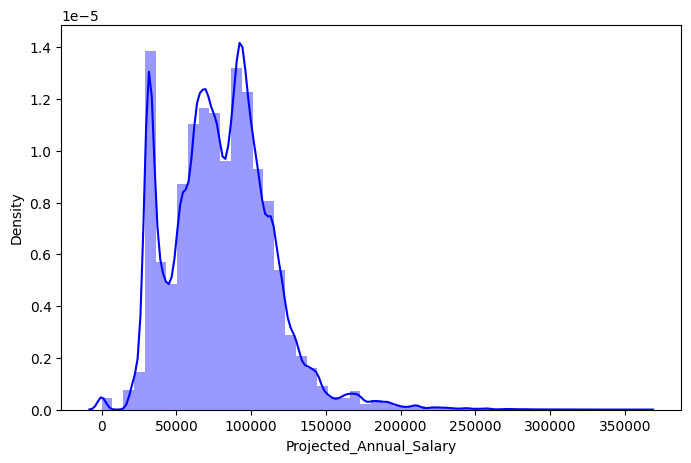

In [63]:
## salary distribution

plt.figure(figsize = (8,5))

sns.distplot(data['Projected_Annual_Salary'], color = 'blue')
# sns.displot(data['Projected_Annual_Salary'], color = 'green')
# sns.histplot(data['Projected_Annual_Salary'], color = 'red')

## Taking samples to perform some statistical tests

In [64]:
data.Year.value_counts(normalize = True) * 100

2016    38.916101
2015    20.970289
2013    20.132417
2014    19.981194
Name: Year, dtype: float64

In [65]:
## 2016

population_2016 = data[data.Year == 2016]
sample_2016 = population_2016.sample(3000, random_state = 42)

In [66]:
sample_2016.head(2)

,Row_ID,Year,Department_Title,Payroll_Department,Record_Number,Job_Class_Title,Employment_Type,Hourly_or_Event_Rate,Projected_Annual_Salary,Q1_Payments,Q2_Payments,Q3_Payments,Q4_Payments,Payments_Over_Base_Pay,%_Over_Base_Pay,Total_Payments,Base_Pay,Permanent_Bonus_Pay,Longevity_Bonus_Pay,Temporary_Bonus_Pay,Lump_Sum_Pay,Overtime_Pay,Other_Pay_&_Adjustments,Other_Pay_(Payroll_Explorer),MOU,MOU_Title,FMS_Department,Job_Class,Pay_Grade,Average_Health_Cost,Average_Dental_Cost,Average_Basic_Life,Average_Benefit_Cost,Benefits_Plan,Job_Class_Link
185712,175197,2016,Airports (LAWA),101.0,3466159162,Building Repairer I,Full Time,29.67,61950.96,16755.86,0.0,0.0,0.0,200.0,0.01,16755.86,16555.86,0.0,0.0,200.0,0.0,0.0,0.0,$200.00,14,Service & Craft,4,3333,NaN,$11012.40,411.36,11.40,11435.16,City,http://per.lacity.org/perspecs/3333.pdf
247648,247269,2016,Police (LAPD),4301.0,2625519528,Police Detective III,Full Time,60.43,126177.84,33940.80,29106.4,0.0,0.0,2617.1,4.33,63047.20,60430.10,1812.8,0.0,0.0,0.0,0.0,804.3,$2617.10,24,"Police Officers, Lts. and Below",70,2223,3,$13639.18,932.71,186.94,14758.83,Police,http://per.lacity.org/perspecs/2223.pdf


In [67]:
# 2015

population_2015 = data[data.Year == 2015]
sample_2015 = population_2015.sample(3000, random_state = 42)

In [68]:
sample_2015.head(2)

,Row_ID,Year,Department_Title,Payroll_Department,Record_Number,Job_Class_Title,Employment_Type,Hourly_or_Event_Rate,Projected_Annual_Salary,Q1_Payments,Q2_Payments,Q3_Payments,Q4_Payments,Payments_Over_Base_Pay,%_Over_Base_Pay,Total_Payments,Base_Pay,Permanent_Bonus_Pay,Longevity_Bonus_Pay,Temporary_Bonus_Pay,Lump_Sum_Pay,Overtime_Pay,Other_Pay_&_Adjustments,Other_Pay_(Payroll_Explorer),MOU,MOU_Title,FMS_Department,Job_Class,Pay_Grade,Average_Health_Cost,Average_Dental_Cost,Average_Basic_Life,Average_Benefit_Cost,Benefits_Plan,Job_Class_Link
184599,172933,2015,Water And Power (DWP),NaN,2762101665,Student Engineer,Part Time,27.44,57294.72,0.00,5817.28,14378.56,1646.4,0.00,0.00,21842.24,21842.24,0.0,0.00,0.0,0.0,NaN,0.0,$0.00,U,UNREPRESENTED UNIT - NON MANAGEMENT BENEFITS,98,7203,NaN,$0.00,0.0,0.0,0.0,NaN,http://per.lacity.org/perspecs/7203.pdf
178504,132125,2015,Library,3501.0,959556715,Messenger Clerk,Part Time,14.91,31129.99,1192.72,0.00,0.00,0.0,31.92,0.03,1192.72,1160.80,0.0,31.92,0.0,0.0,0.0,0.0,$31.92,03,CLERICAL,44,1111,A,$0.00,0.0,0.0,0.0,NaN,http://per.lacity.org/perspecs/1111.pdf


In [69]:
# 2014 

population_2014 = data[data.Year == 2014]
sample_2014 = population_2014.sample(3000, random_state = 42)

In [70]:
sample_2014.head(2)

,Row_ID,Year,Department_Title,Payroll_Department,Record_Number,Job_Class_Title,Employment_Type,Hourly_or_Event_Rate,Projected_Annual_Salary,Q1_Payments,Q2_Payments,Q3_Payments,Q4_Payments,Payments_Over_Base_Pay,%_Over_Base_Pay,Total_Payments,Base_Pay,Permanent_Bonus_Pay,Longevity_Bonus_Pay,Temporary_Bonus_Pay,Lump_Sum_Pay,Overtime_Pay,Other_Pay_&_Adjustments,Other_Pay_(Payroll_Explorer),MOU,MOU_Title,FMS_Department,Job_Class,Pay_Grade,Average_Health_Cost,Average_Dental_Cost,Average_Basic_Life,Average_Benefit_Cost,Benefits_Plan,Job_Class_Link
105830,88079,2014,Police (LAPD),4302.0,4126111034,Garage Attendant,Full Time,25.61,53477.86,11137.48,13363.07,12297.76,6290.82,3918.49,10.0,43089.13,39170.64,0.0,3127.53,150.0,636.96,0.00,4.0,$3918.49,14,SERVICEMEN & CRAFTSMEN,70,3531,0,$11000.40,409.68,11.4,11421.48,City,http://per.lacity.org/perspecs/3531.pdf
83726,64234,2014,Controller,2601.0,2117444485,Accounting Clerk II,Full Time,32.65,68169.55,15672.91,19984.65,16864.58,18398.02,8211.88,13.1,70920.16,62708.28,0.0,5040.83,0.0,0.00,2571.05,600.0,$5640.83,03,CLERICAL UNIT,26,1223,2,$11000.40,409.68,11.4,11421.48,City,http://per.lacity.org/perspecs/1223.pdf


### Calculating Different Parameters

In [71]:
# Interested in population and sample datas, Annual_Salary

annual_sal_2016_mean = population_2016['Projected_Annual_Salary'].mean()
annual_sal_2016_stddev = population_2016['Projected_Annual_Salary'].std()
sample_sal_2016_mean = sample_2016['Projected_Annual_Salary'].mean()
sample_sal_2016_stddev = sample_2016['Projected_Annual_Salary'].std()

annual_sal_2015_mean = population_2015['Projected_Annual_Salary'].mean()
annual_sal_2015_stddev = population_2015['Projected_Annual_Salary'].std()
sample_sal_2015_mean = sample_2015['Projected_Annual_Salary'].mean()
sample_sal_2015_stddev = sample_2015['Projected_Annual_Salary'].std()

annual_sal_2014_mean = population_2014['Projected_Annual_Salary'].mean()
annual_sal_2014_stddev = population_2014['Projected_Annual_Salary'].std()
sample_sal_2014_mean = sample_2014['Projected_Annual_Salary'].mean()
sample_sal_2014_stddev = sample_2014['Projected_Annual_Salary'].std()

In [72]:
## printing all statements

print(f"IN 2016, Population Annual Salary mean is {annual_sal_2016_mean} and population Annual Salary Standard deviation is {annual_sal_2016_stddev}")
print(f"IN 2016, Sample Annual Salary mean is {sample_sal_2016_mean} and Sample Annual Salary Standard deviation is {sample_sal_2016_stddev}")
print("\n")
print(f"IN 2015, Population Annual Salary mean is {annual_sal_2015_mean} and population Annual Salary Standard deviation is {annual_sal_2015_stddev}")
print(f"IN 2015, Sample Annual Salary mean is {sample_sal_2015_mean} and Sample Annual Salary Standard deviation is {sample_sal_2015_stddev}")
print("\n")
print(f"IN 2014, Population Annual Salary mean is {annual_sal_2014_mean} and population Annual Salary Standard deviation is {annual_sal_2014_stddev}")
print(f"IN 2014, Sample Annual Salary mean is {sample_sal_2014_mean} and Sample Annual Salary Standard deviation is {sample_sal_2014_stddev}")

IN 2016, Population Annual Salary mean is 81360.45703671314 and population Annual Salary Standard deviation is 33321.44856541809
IN 2016, Sample Annual Salary mean is 81073.30312333333 and Sample Annual Salary Standard deviation is 33758.194187675654


IN 2015, Population Annual Salary mean is 79089.18237723158 and population Annual Salary Standard deviation is 34230.02855425747
IN 2015, Sample Annual Salary mean is 79067.84244 and Sample Annual Salary Standard deviation is 35170.47617232447


IN 2014, Population Annual Salary mean is 80294.28583251388 and population Annual Salary Standard deviation is 33317.42690854196
IN 2014, Sample Annual Salary mean is 79680.47004666667 and Sample Annual Salary Standard deviation is 33180.97021648621


### Analyse whether the means are similar or not?

In [73]:
print("P_value for 2014-2015 : ", stats.ttest_rel(sample_2014['Projected_Annual_Salary'], sample_2015['Projected_Annual_Salary'], axis = 0)[1])
print("P_value for 2014-2016 : ", stats.ttest_rel(sample_2014['Projected_Annual_Salary'], sample_2016['Projected_Annual_Salary'], axis = 0)[1])
print("P_value for 2015-2016 : ", stats.ttest_rel(sample_2016['Projected_Annual_Salary'], sample_2015['Projected_Annual_Salary'], axis = 0)[1])

P_value for 2014-2015 :  0.4973889156685757
P_value for 2014-2016 :  0.1055305110846892
P_value for 2015-2016 :  0.02349117877260473


### Performing ANOVA test for different `Base Pay` accross the `Electrician` position

In [74]:
data.Job_Class_Title.value_counts()

Police Officer II                                               21240
Police Officer III                                              10953
Recreation Assistant                                            10250
Firefighter III                                                  8766
Administrative Clerk                                             5152
                                                                ...  
Pile Driver Worker II                                               1
Airport Police Chief                                                1
General Manager Los Angeles City Employees Retirement System        1
CHIEF INFORMATION SECURITY OFFICER                                  1
General Manager Recreation and Parks                                1
Name: Job_Class_Title, Length: 1638, dtype: int64

In [100]:
## filtering the dataset only having `electrician` as job title and `Base_Pay` as calculative column

data_electrician = data[data.Job_Class_Title == 'Electrician'][['Year', 'Base_Pay']]

In [101]:
data_electrician.shape

(424, 2)

In [102]:
data_electrician.Year.value_counts(normalize = True) * 100

2016    39.150943
2013    21.462264
2015    20.990566
2014    18.396226
Name: Year, dtype: float64

In [103]:
data_electrician.Year.value_counts()

2016    166
2013     91
2015     89
2014     78
Name: Year, dtype: int64

In [104]:
## taking 50 samples from 2014, 2015, and 2016

sample_elec_2014 = data_electrician[data_electrician.Year == 2014].sample(50)
sample_elec_2015 = data_electrician[data_electrician.Year == 2015].sample(50)
sample_elec_2016 = data_electrician[data_electrician.Year == 2016].sample(50)


In [112]:
## calculating sample mean and standard deviation

sample_elec_base_2014_mean = sample_elec_2014['Base_Pay'].mean()
sample_elec_base_2014_stddev = sample_elec_2014['Base_Pay'].std()

sample_elec_base_2015_mean = sample_elec_2015['Base_Pay'].mean()
sample_elec_base_2015_stddev = sample_elec_2015['Base_Pay'].std()

sample_elec_base_2016_mean = sample_elec_2016['Base_Pay'].mean()
sample_elec_base_2016_stddev = sample_elec_2016['Base_Pay'].std()


print(f"Sample Base Pay mean for year 2014 is {sample_elec_base_2014_mean} and standard deviation is {sample_elec_base_2014_stddev}")
print(f"Sample Base Pay mean for year 2015 is {sample_elec_base_2015_mean} and standard deviation is {sample_elec_base_2015_stddev}")
print(f"Sample Base Pay mean for year 2016 is {sample_elec_base_2016_mean} and standard deviation is {sample_elec_base_2016_stddev}")

Sample Base Pay mean for year 2014 is 73879.6792 and standard deviation is 19081.02947190988
Sample Base Pay mean for year 2015 is 72390.90939999999 and standard deviation is 24531.319899776634
Sample Base Pay mean for year 2016 is 32921.191 and standard deviation is 11631.478417920747


In [113]:
## creating samples of containing `Base_Pay` only

sample_2014 = sample_elec_2014['Base_Pay']
sample_2015 = sample_elec_2015['Base_Pay']
sample_2016 = sample_elec_2016['Base_Pay']

In [115]:
## ANOVA test for the samples

p_value = stats.f_oneway(sample_2014, sample_2015, sample_2016)[1]

print(f"P-value, {p_value} for the ANOVA test is quite low, is less than 0.05, that's why we will be rejecting the NULL Hypothesis")

P-value, 7.465167667535771e-23 for the ANOVA test is quite low, is less than 0.05, that's why we will be rejecting the NULL Hypothesis
